In [1]:
import os
import shutil
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_sales = pd.read_csv('sales_train_v2.csv')

# Create a table with a new column "item_cnt_month" which is the total number of items sold in the month for each "shop_id"

In [3]:
# Select Columns
df_shop_cnt_month = df_sales[['shop_id', 'date_block_num', 'item_cnt_day']]
# GroupBy
df_shop_cnt_month = df_shop_cnt_month.groupby(['shop_id','date_block_num'])
# Sum item_cnt_day to get item_cnt_month in a new column in the dataframe
df_shop_cnt_month = df_shop_cnt_month['item_cnt_day'].sum().reset_index(name='item_cnt_month')
df_shop_cnt_month

,shop_id,date_block_num,item_cnt_month
0,0,0,5578.0
1,0,1,6127.0
2,1,0,2947.0
3,1,1,3364.0
4,2,0,1146.0
...,...,...,...
1581,59,29,913.0
1582,59,30,992.0
1583,59,31,1214.0
1584,59,32,914.0


# Add a column that says True if any items were sold that month for that "shop_id"

In [4]:
# create a new column that says if item_cnt_month > 0
df_shop_cnt_month['month_sold_items'] = df_shop_cnt_month['item_cnt_month'] > 0
df_shop_cnt_month

,shop_id,date_block_num,item_cnt_month,month_sold_items
0,0,0,5578.0,True
1,0,1,6127.0,True
2,1,0,2947.0,True
3,1,1,3364.0,True
4,2,0,1146.0,True
...,...,...,...,...
1581,59,29,913.0,True
1582,59,30,992.0,True
1583,59,31,1214.0,True
1584,59,32,914.0,True


# Create a new dataframe that has the total number of months that contain sales

In [5]:
df_cnt_month_groupby = df_shop_cnt_month.groupby(['shop_id'])['month_sold_items'].sum().reset_index(name='num_months_sales')
df_cnt_month_groupby

,shop_id,num_months_sales
0,0,2.0
1,1,2.0
2,2,34.0
3,3,34.0
4,4,34.0
5,5,33.0
6,6,34.0
7,7,34.0
8,8,3.0
9,9,3.0


# Join the "df_cnt_month_groupby" dataframe to the "df_sales" dataframe to create a new dataframe that contains only "shop_id" with sales of greater than 12 months

In [6]:
df_sales_good_sales = df_sales
# join the tables using the shop_id
df_sales_good_sales  = df_sales_good_sales.join(df_cnt_month_groupby.set_index('shop_id'), on='shop_id')
# drop all rows where sales are less than or equal to 12 months
df_sales_good_sales = df_sales_good_sales[df_sales_good_sales['num_months_sales'] > 12]
df_sales_good_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886360 entries, 0 to 2935848
Data columns (total 7 columns):
date                object
date_block_num      int64
shop_id             int64
item_id             int64
item_price          float64
item_cnt_day        float64
num_months_sales    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 176.2+ MB


In [7]:
# check shop 0 which we know has less than 12 months sales.  This is an empty table as expected
df_sales_good_sales.loc[df_sales_good_sales['shop_id']==0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,num_months_sales


In [8]:
# check shop 2 which we know has 33 months sales.  This is an full table as expected
df_sales_good_sales.loc[df_sales_good_sales['shop_id']==2]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,num_months_sales
31951,14.01.2013,0,2,11330,149.0,1.0,34.0
31952,14.01.2013,0,2,11331,149.0,1.0,34.0
31953,14.01.2013,0,2,11332,149.0,1.0,34.0
31954,11.01.2013,0,2,11015,199.0,1.0,34.0
31955,07.01.2013,0,2,11030,149.0,1.0,34.0
...,...,...,...,...,...,...,...
2917264,14.10.2015,33,2,7223,3999.0,1.0,34.0
2917265,15.10.2015,33,2,7223,3999.0,1.0,34.0
2917266,16.10.2015,33,2,7223,3999.0,1.0,34.0
2917267,24.10.2015,33,2,7223,3999.0,2.0,34.0


# Plot all good shops with more than 12 months sales

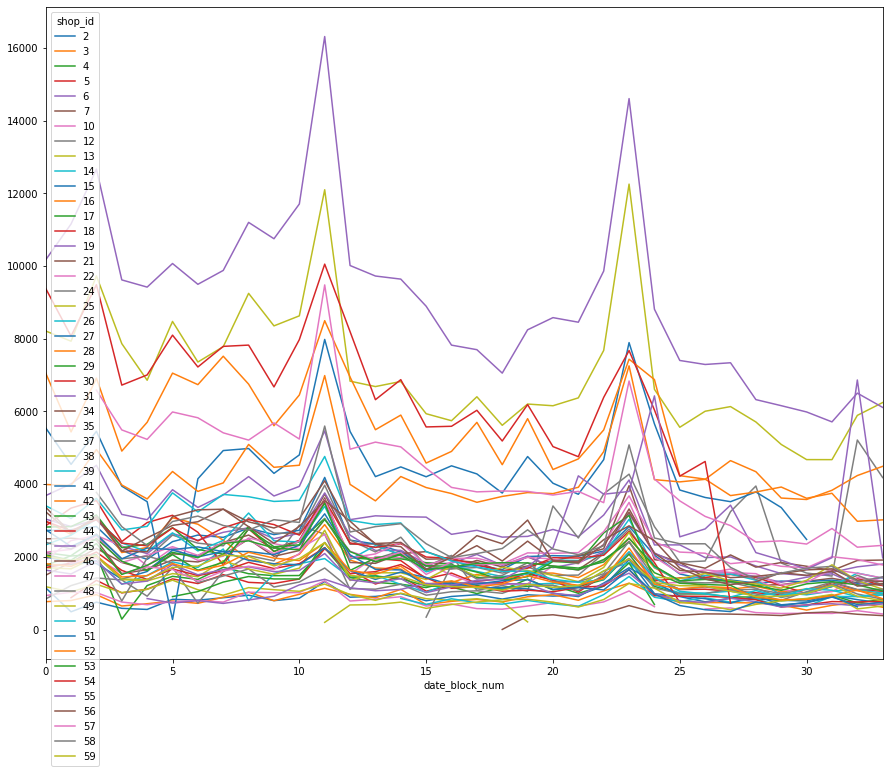

In [9]:
group_all = df_sales_good_sales.groupby(['shop_id','date_block_num'])['item_cnt_day'].sum()
fig, ax = plt.subplots(figsize=(15,12))
ax = group_all.unstack(level=0).plot(ax=ax)